### Prepare rules for the all the data sets 
### 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
### 2) Change the minimum length in apriori algorithm
### 3) Visulize the obtained rules using different plots 


In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
book_data = pd.read_csv('book.csv')

In [5]:
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
book_data.shape

(2000, 11)

In [7]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
book_data.sum(axis=0)

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')

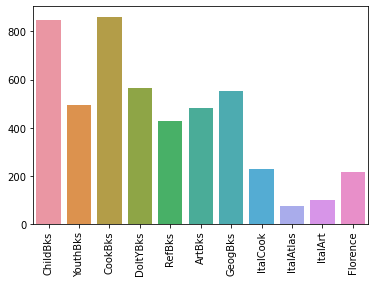

In [10]:
sns.barplot(book_data.columns, book_data.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

In [13]:
book_sales = apriori(book_data, min_support=0.005, max_len=2,use_colnames = True)
book_sales

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0375,"(ItalArt, ItalCook)"
62,0.0175,"(Florence, ItalCook)"
63,0.0165,"(ItalArt, ItalAtlas)"
64,0.0065,"(Florence, ItalAtlas)"


In [15]:
book_sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value: \n",book_sales)


Sorted as per Support value: 
     support               itemsets
2    0.4310              (CookBks)
0    0.4230             (ChildBks)
3    0.2820             (DoItYBks)
6    0.2760              (GeogBks)
12   0.2560    (ChildBks, CookBks)
..      ...                    ...
27   0.0175  (YouthBks, ItalAtlas)
62   0.0175   (Florence, ItalCook)
63   0.0165   (ItalArt, ItalAtlas)
65   0.0125    (ItalArt, Florence)
64   0.0065  (Florence, ItalAtlas)

[66 rows x 2 columns]


In [16]:
rules = association_rules(book_sales, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
102,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
68,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
69,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
87,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
...,...,...,...,...,...,...,...,...,...
59,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
74,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
75,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
60,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


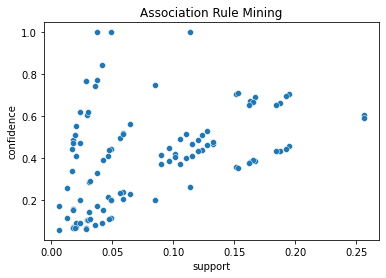

In [17]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

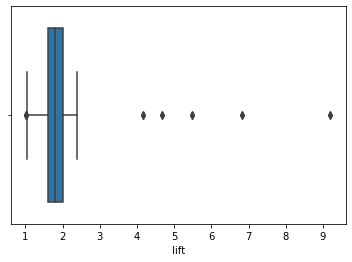

In [21]:
sns.boxplot(rules['lift'], data=rules)
plt.show()

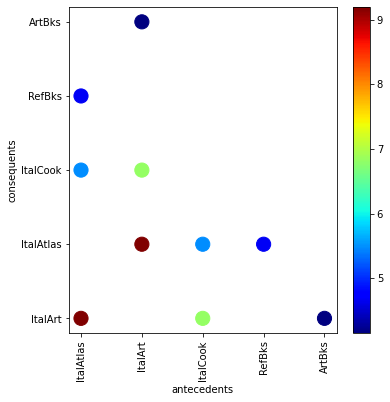

In [22]:
A1 = rules.antecedents.iloc[0:10]
B1 = rules.consequents.iloc[0:10]
C1 = rules.lift.iloc[0:10]

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 values
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

## With other values of support and confidence

In [24]:
Book_Sales = apriori(book_data, min_support=0.003, max_len=4,use_colnames = True)
print("Raw Data:\n",Book_Sales.head())

# Sort decending order based on support  
Book_Sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",Book_Sales.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (ChildBks, CookBks)


In [25]:
rules1 = association_rules(Book_Sales, metric="lift", min_threshold=2)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1730,"(RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
1735,"(ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
4170,"(RefBks, ItalArt)","(Florence, ItalAtlas)",0.0200,0.0065,0.0040,0.200000,30.769231,0.003870,1.241875
4175,"(Florence, ItalAtlas)","(RefBks, ItalArt)",0.0065,0.0200,0.0040,0.615385,30.769231,0.003870,2.548000
2699,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222
...,...,...,...,...,...,...,...,...,...
3956,(ChildBks),"(Florence, ItalAtlas)",0.4230,0.0065,0.0055,0.013002,2.000364,0.002750,1.006588
3893,(ChildBks),"(RefBks, Florence, ItalAtlas)",0.4230,0.0065,0.0055,0.013002,2.000364,0.002750,1.006588
354,(ChildBks),"(GeogBks, YouthBks, ArtBks)",0.4230,0.0650,0.0550,0.130024,2.000364,0.027505,1.074742
347,"(GeogBks, YouthBks, ArtBks)",(ChildBks),0.0650,0.4230,0.0550,0.846154,2.000364,0.027505,3.750500


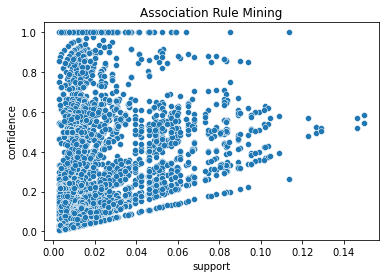

In [26]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule Mining")
plt.show()

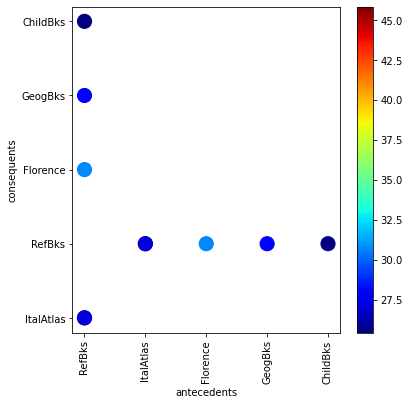

In [27]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()